## Slepian-Wolf Coding Demo

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")     # Set linear programming solver
PsiOpts.setting(repr_latex = True)         # Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)         # LaTeX in diagrams
PsiOpts.setting(proof_note_color = "blue") # Reasons in proofs are blue

### Thm 10.1 (Slepian-Wolf)


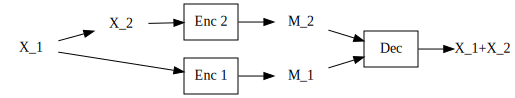

In [2]:
X1, X2 = rv_array("X", 1, 3)
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()        # Define Slepian-Wolf coding setting
model.set_rate(M1, R1)       # The rate of M1, M2 are R1, R2 resp.
model.set_rate(M2, R2)
model.add_edge(X1, X2)       # X1, X2 are correlated source
model.add_node(X1, M1,
            label = "Enc 1") # Encoder 1 maps X1 to M1
model.add_node(X2, M2,
            label = "Enc 2") # Encoder 2 maps X2 to M2
model.add_node(M1+M2, X1+X2,
            label = "Dec")   # Decoder maps M1,M2 to X1,X2

model.graph()                # Draw diagram

In [3]:
r = model.get_inner(is_proof=True)  # Automatic inner bound, gives [Slepian-Wolf 1973]
r.display(note=True)  # Include reasons in blue

<IPython.core.display.Math object>

In [4]:
# Automatic outer bound with 0 auxiliary, gives [Slepian-Wolf 1973]
model.get_outer(0)

( ( R_1 >= H(X_1|X_2) )
 &( R_2 >= H(X_2|X_1) )
 &( R_1+R_2 >= H(X_1+X_2) ) )

In [5]:
# Output converse proof
model.proof_outer(r)

### Thm 10.2 (Lossless Source Coding w/ Helper / WAK Network)


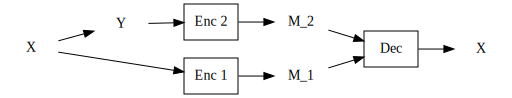

In [6]:
X, Y, U = rv("X, Y, U")
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()        # Define WAK network [Wyner 1975], [Ahlswede-Körner 1975]
model.set_rate(M1, R1)       # The rate of M1, M2 are R1, R2 resp.
model.set_rate(M2, R2)
model.add_edge(X, Y)         # X, Y are correlated source
model.add_node(X, M1,
            label = "Enc 1") # Encoder 1 maps X to M1
model.add_node(Y, M2,
            label = "Enc 2") # Encoder 2 maps Y to M2
model.add_node(M1+M2, X,
            label = "Dec")   # Decoder maps M1,M2 to X

model.graph()                # Draw diagram

In [7]:
# Automatic outer bound, recovers WAK region
r_wak = model.get_outer(1)
r_wak

( ( R_2 >= I(A&Y) )
 &( R_1 >= H(X|A) )
 &( markov(A, Y, X) ) ).exists(A)

In [8]:
r = model.get_inner(is_proof=True)  # Automatic inner bound
r.display(note=True)  # Include reasons in blue

<IPython.core.display.Math object>

In [9]:
# Although the above region does not look like the WAK region
# [Wyner 1975], [Ahlswede-Körner 1975], they are actually equivalent.

# Requires a higher level of searching to prove
with PsiOpts(auxsearch_level = 10):
    (r >> r_wak).proof().display()
    (r_wak >> r).proof().display()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
# Achievability proof
model.proof_inner(r_wak).display(str_proof_note=True)

<IPython.core.display.Math object>

In [11]:
# Converse proof
model.proof_outer(r_wak)

### Thm 10.3, 10.4 (More than 2 Sources)

Skipped

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 10.
-  D. Slepian and J. K. Wolf, "Noiseless coding of correlated information sources," IEEE Trans. Inf. Theory, vol. IT-19, no. 4, pp. 471–480, Jul. 1973.
